Cargar librerias y Funciones para el entrenamiento, carga de datos: Se usa el dataset de cáncer de mama de sklearn, con las características y etiquetas separadas.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Cargar el dataset de cáncer de mama
data = load_breast_cancer(as_frame=True)
df = data.frame
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [35]:
# Separar características (X) y etiquetas (y)
X = df.iloc[:, :-1].values  # Todas las columnas excepto la última son las características
y = df.iloc[:, -1].values   # La última columna es la etiqueta

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convertir las etiquetas a formato categórico (one-hot encoding para Keras)
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [36]:
X_train.shape

(455, 30)

In [37]:
# **1. Modelo Keras**
# Definir el modelo de red neuronal
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))  # Capa de entrada con 16 nodos
model.add(Dense(8, activation='relu'))  # Capa oculta con 8 nodos
model.add(Dense(2, activation='softmax'))  # Capa de salida (2 clases con softmax)

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Definir early stopping para evitar overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(X_train, y_train_categorical, validation_data=(X_test, y_test_categorical),
                    epochs=100, batch_size=32, callbacks=[early_stopping])

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test_categorical)
print(f'Pérdida en el conjunto de prueba (Keras): {loss:.4f}')
print(f'Precisión en el conjunto de prueba (Keras): {accuracy:.4f}')

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4582 - loss: 0.7977 - val_accuracy: 0.6404 - val_loss: 0.6221
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6852 - loss: 0.5934 - val_accuracy: 0.8333 - val_loss: 0.4886
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8187 - loss: 0.4810 - val_accuracy: 0.9123 - val_loss: 0.4175
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9095 - loss: 0.4207 - val_accuracy: 0.9386 - val_loss: 0.3652
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9436 - loss: 0.3685 - val_accuracy: 0.9561 - val_loss: 0.3179
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9420 - loss: 0.3186 - val_accuracy: 0.9561 - val_loss: 0.2755
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9539 - loss: 0.2656 - val_accuracy: 0.9474 - val_loss: 0.2366
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9523 - loss: 0.2437 - val_accuracy: 0.9474 - val_loss: 0.

In [41]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 16)                  │             496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,952 (7.63 KB)

 Trainable params: 650 (2.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,302 (5.09 KB)

In [38]:
# **2. Modelo MLPClassifier (Scikit-learn)**
# Crear el modelo
mlp = MLPClassifier(hidden_layer_sizes=(16, 8), activation='relu', max_iter=500, random_state=42)

# Entrenar el modelo
mlp.fit(X_train, y_train)

# Evaluar el modelo
mlp_accuracy = mlp.score(X_test, y_test)
print(f'Precisión en el conjunto de prueba (MLPClassifier): {mlp_accuracy:.4f}')

Precisión en el conjunto de prueba (MLPClassifier): 0.9649


In [39]:
# Predicciones y matriz de confusión para ambos modelos
y_pred_keras = np.argmax(model.predict(X_test), axis=1)
y_pred_mlp = mlp.predict(X_test)

# Matriz de confusión Keras
cm_keras = confusion_matrix(y_test, y_pred_keras)
# Matriz de confusión MLPClassifier
cm_mlp = confusion_matrix(y_test, y_pred_mlp)


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


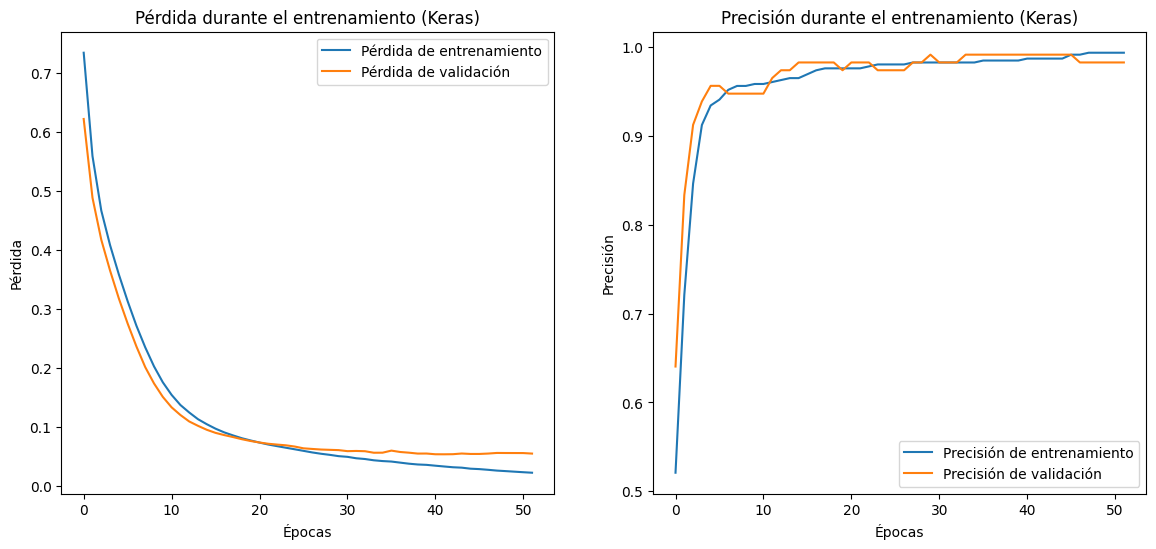

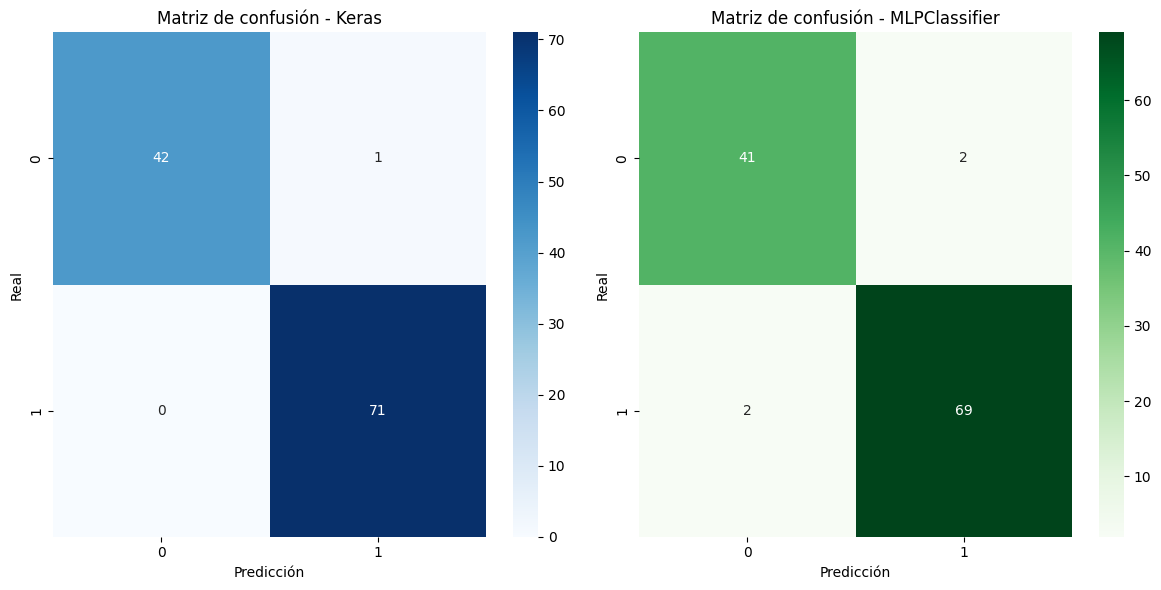


**Reporte de clasificación - Keras**
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114


**Reporte de clasificación - MLPClassifier**
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [40]:
# **Gráficos**
plt.figure(figsize=(14, 6))

# Gráfico de la pérdida (Keras)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento (Keras)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Gráfico de la precisión (Keras)
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento (Keras)')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()

# **Matriz de Confusión (Keras y MLPClassifier)**
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Matriz de confusión para Keras
sns.heatmap(cm_keras, annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title('Matriz de confusión - Keras')
ax[0].set_xlabel('Predicción')
ax[0].set_ylabel('Real')

# Matriz de confusión para MLPClassifier
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="Greens", ax=ax[1])
ax[1].set_title('Matriz de confusión - MLPClassifier')
ax[1].set_xlabel('Predicción')
ax[1].set_ylabel('Real')

plt.tight_layout()
plt.show()

# **Análisis de las métricas**
print("\n**Reporte de clasificación - Keras**")
print(classification_report(y_test, y_pred_keras))

print("\n**Reporte de clasificación - MLPClassifier**")
print(classification_report(y_test, y_pred_mlp))
